In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from geopy.distance import great_circle  # For calculating distances
import geopandas as gpd
from shapely import wkt
from shapely.wkt import loads

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("Los_Angeles.csv")
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [3]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599780 entries, 0 to 599779
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DR Number               599780 non-null  Int64 
 1   Date Reported           599780 non-null  string
 2   Date Occurred           599780 non-null  string
 3   Time Occurred           599780 non-null  Int64 
 4   Area ID                 599780 non-null  Int64 
 5   Area Name               599780 non-null  string
 6   Reporting District      599780 non-null  Int64 
 7   Crime Code              599780 non-null  Int64 
 8   Crime Code Description  599780 non-null  string
 9   MO Codes                512598 non-null  string
 10  Victim Age              513934 non-null  Int64 
 11  Victim Sex              589705 non-null  string
 12  Victim Descent          588762 non-null  string
 13  Premise Code            598821 non-null  Int64 
 14  Premise Description     598820 non-n

In [4]:
import pandas as pd

# Create a DataFrame with the column names and null counts
null_counts = pd.DataFrame({
    'Column': df.columns,
    'Null Count': [df[column].isnull().sum() for column in df.columns]
})

# Calculate the percentage of missing values
null_counts['Percentage Missing'] = null_counts['Null Count'] / df.shape[0] * 100
null_counts['Percentage Missing'] = null_counts['Percentage Missing'].round(2)
print(null_counts)


                    Column  Null Count  Percentage Missing
0                DR Number           0                0.00
1            Date Reported           0                0.00
2            Date Occurred           0                0.00
3            Time Occurred           0                0.00
4                  Area ID           0                0.00
5                Area Name           0                0.00
6       Reporting District           0                0.00
7               Crime Code           0                0.00
8   Crime Code Description           0                0.00
9                 MO Codes       87182               14.54
10              Victim Age       85846               14.31
11              Victim Sex       10075                1.68
12          Victim Descent       11018                1.84
13            Premise Code         959                0.16
14     Premise Description         960                0.16
15                 Address           0                0.

In [5]:
df['Time Occurred'].head()

0     450
1    2320
2     545
3     350
4    2100
Name: Time Occurred, dtype: Int64

In [6]:
df['Victim Age'].unique()

<IntegerArray>
[  22,   30, <NA>,   21,   49,   60,   73,   39,   48,   68,   63,   35,   61,
   37,   55,   62,   72,   41,   76,   40,   38,   18,   24,   54,   52,   28,
   53,   34,   32,   65,   33,   25,   29,   50,   26,   31,   67,   27,   20,
   66,   46,   43,   19,   58,   57,   42,   84,   99,   23,   36,   69,   51,
   88,   90,   44,   17,   47,   77,   16,   64,   56,   59,   86,   45,   75,
   74,   71,   70,   83,   15,   85,   79,   13,   14,   12,   87,   89,   80,
   82,   78,   11,   81,   91,   10,   96,   95,   92,   93,   94,   98,   97]
Length: 91, dtype: Int64

In [7]:
median_age = df['Victim Age'].median()
df['Victim Age'].fillna(math.ceil(median_age), inplace=True)
df['Victim Age'] = df['Victim Age'].astype('Int64')

In [8]:
df['Victim Sex'].unique()

<StringArray>
['M', 'F', 'X', <NA>, 'H', 'N', '-']
Length: 7, dtype: string

In [9]:
# Assuming 'df' is your dataframe
valid_sex_values = ['M', 'F']
df['Victim Sex'] = df['Victim Sex'].apply(lambda x: x if pd.notna(x) and x in valid_sex_values else None)
mode_sex = df['Victim Sex'].mode().iloc[0]
df['Victim Sex'].fillna(mode_sex, inplace=True)


In [10]:
df.dropna(subset=['Premise Code', 'Premise Description'], inplace=True)

In [11]:
df.drop(columns=["Crime Code Description", "Crime Code", "Reporting District", "Victim Descent", "Cross Street"], inplace=True)

In [12]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598820 entries, 0 to 599779
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DR Number            598820 non-null  Int64 
 1   Date Reported        598820 non-null  string
 2   Date Occurred        598820 non-null  string
 3   Time Occurred        598820 non-null  Int64 
 4   Area ID              598820 non-null  Int64 
 5   Area Name            598820 non-null  string
 6   MO Codes             511690 non-null  string
 7   Victim Age           598820 non-null  Int64 
 8   Victim Sex           598820 non-null  string
 9   Premise Code         598820 non-null  Int64 
 10  Premise Description  598820 non-null  string
 11  Address              598820 non-null  string
 12  Location             598820 non-null  string
dtypes: Int64(5), string(8)
memory usage: 66.8 MB


In [13]:
df['MO Codes'] = df['MO Codes'].fillna('0605')

In [14]:
def get_severity_and_factors(mo_codes):
    mo_list = mo_codes.split()

    # Severity mapping
    if any(code in mo_list for code in ['3024', '3027']):
        severity = 3
    elif any(code in mo_list for code in ['3025', '3026']):
        severity = 2
    elif '3028' in mo_list:
        severity = 1
    else:
        severity = 1  # Default value
    
    # Factors mapping
    if any(code in mo_list for code in ['3029', '3030', '3038', '3039', '3040']):
        factors = 'Road Rage'
    elif '3201' in mo_list:
        factors = 'Weather/Road'
    else:
        factors = 'Traffic Accident'  # Default value
    
    return severity, factors

# Apply the function to your dataset
df['Severity'], df['Factors'] = zip(*df['MO Codes'].apply(get_severity_and_factors))

In [15]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,MO Codes,Victim Age,Victim Sex,Premise Code,Premise Description,Address,Location,Severity,Factors
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,3036 3004 3026 3101 4003,22,M,101,STREET,JEFFERSON BL,"(34.0255, -118.3002)",2,Traffic Accident
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,3037 3006 3028 3030 3039 3101 4003,30,F,101,STREET,JEFFERSON BL,"(34.0256, -118.3089)",1,Road Rage
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,3101 3401 3701 3006 3030,38,M,101,STREET,N BROADWAY,"(34.0738, -118.2078)",1,Road Rage
3,190127578,11/20/2019,11/20/2019,350,1,Central,0605 3101 3401 3701 3011 3034,21,M,101,STREET,1ST,"(34.0492, -118.2391)",1,Traffic Accident
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,0605 4025 3037 3004 3025 3101,49,M,101,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)",2,Traffic Accident


In [16]:
df['Factors'].value_counts()


Factors
Traffic Accident    343656
Road Rage           255159
Weather/Road             5
Name: count, dtype: int64

In [17]:
df['Severity'].value_counts()

Severity
1    373509
2    208114
3     17197
Name: count, dtype: int64

In [18]:
df.drop(columns=['MO Codes'], inplace=True)

In [19]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598820 entries, 0 to 599779
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DR Number            598820 non-null  Int64 
 1   Date Reported        598820 non-null  string
 2   Date Occurred        598820 non-null  string
 3   Time Occurred        598820 non-null  Int64 
 4   Area ID              598820 non-null  Int64 
 5   Area Name            598820 non-null  string
 6   Victim Age           598820 non-null  Int64 
 7   Victim Sex           598820 non-null  string
 8   Premise Code         598820 non-null  Int64 
 9   Premise Description  598820 non-null  string
 10  Address              598820 non-null  string
 11  Location             598820 non-null  string
 12  Severity             598820 non-null  Int64 
 13  Factors              598820 non-null  string
dtypes: Int64(6), string(8)
memory usage: 72.0 MB


In [20]:
# Use regular expression to extract latitude and longitude
df[['Latitude', 'Longitude']] = df['Location'].str.extract(r'\(([^,]+),\s*([^)]+)\)')

# Convert the data type of the new columns to numeric
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].apply(pd.to_numeric)


In [21]:
print(df['Time Occurred'].iloc[218:220])


218    1300
219    1230
Name: Time Occurred, dtype: Int64


In [22]:
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])
# Convert the 'Time Occurred' column to a time format
df['Time Occurred'] = pd.to_datetime(df['Time Occurred'].astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.time

df['Date Reported'] = pd.to_datetime(df['Date Reported'])


In [50]:
df['Factors'].unique()

<StringArray>
['Traffic Accident', 'Road Rage', 'Weather/Road']
Length: 3, dtype: string

In [23]:
print(type(df['Time Occurred'][0]))


<class 'datetime.time'>


In [24]:
df['Day of Week'] = df['Date Occurred'].dt.day_name()
df['Month'] = df['Date Occurred'].dt.month
df['Year'] = df['Date Occurred'].dt.year

In [31]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598820 entries, 0 to 599779
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DR Number            598820 non-null  Int64         
 1   Date Reported        598820 non-null  datetime64[ns]
 2   Date Occurred        598820 non-null  datetime64[ns]
 3   Time Occurred        598820 non-null  object        
 4   Area ID              598820 non-null  Int64         
 5   Area Name            598820 non-null  string        
 6   Victim Age           598820 non-null  Int64         
 7   Victim Sex           598820 non-null  string        
 8   Premise Code         598820 non-null  Int64         
 9   Premise Description  598820 non-null  string        
 10  Address              598820 non-null  string        
 11  Location             598820 non-null  string        
 12  Severity             598820 non-null  Int64         
 13  Factors            

In [26]:
df1 = df.copy()

In [27]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Victim Age,Victim Sex,Premise Code,Premise Description,Address,Location,Severity,Factors,Latitude,Longitude,Day of Week,Month,Year
0,190319651,2019-08-24,2019-08-24,04:50:00,3,Southwest,22,M,101,STREET,JEFFERSON BL,"(34.0255, -118.3002)",2,Traffic Accident,34.0255,-118.3002,Saturday,8,2019
1,190319680,2019-08-30,2019-08-30,23:20:00,3,Southwest,30,F,101,STREET,JEFFERSON BL,"(34.0256, -118.3089)",1,Road Rage,34.0256,-118.3089,Friday,8,2019
2,190413769,2019-08-25,2019-08-25,05:45:00,4,Hollenbeck,38,M,101,STREET,N BROADWAY,"(34.0738, -118.2078)",1,Road Rage,34.0738,-118.2078,Sunday,8,2019
3,190127578,2019-11-20,2019-11-20,03:50:00,1,Central,21,M,101,STREET,1ST,"(34.0492, -118.2391)",1,Traffic Accident,34.0492,-118.2391,Wednesday,11,2019
4,190319695,2019-08-30,2019-08-30,21:00:00,3,Southwest,49,M,101,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)",2,Traffic Accident,34.0108,-118.3182,Friday,8,2019


In [39]:
# Get the number of unique values for each column
unique_counts_per_column = df.nunique()

# Display the results for each column
for column_name, unique_count in unique_counts_per_column.items():
    print(f'Column "{column_name}" has {unique_count} unique values.')

Column "DR Number" has 598820 unique values.
Column "Date Reported" has 5063 unique values.
Column "Date Occurred" has 5063 unique values.
Column "Time Occurred" has 1439 unique values.
Column "Area ID" has 21 unique values.
Column "Area Name" has 21 unique values.
Column "Victim Age" has 90 unique values.
Column "Victim Sex" has 2 unique values.
Column "Premise Code" has 122 unique values.
Column "Premise Description" has 122 unique values.
Column "Address" has 28854 unique values.
Column "Location" has 53046 unique values.
Column "Severity" has 3 unique values.
Column "Factors" has 3 unique values.
Column "Latitude" has 5054 unique values.
Column "Longitude" has 4837 unique values.
Column "Day of Week" has 7 unique values.
Column "Month" has 12 unique values.
Column "Year" has 14 unique values.


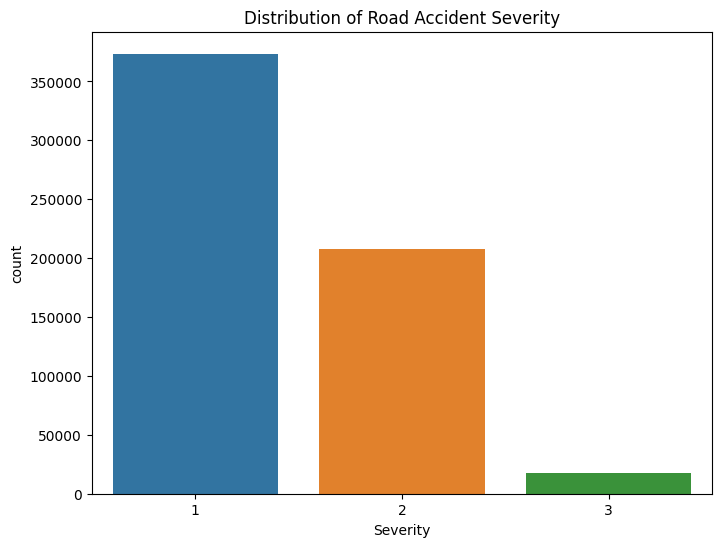

TypeError: reduction operation 'argmin' not allowed for this dtype

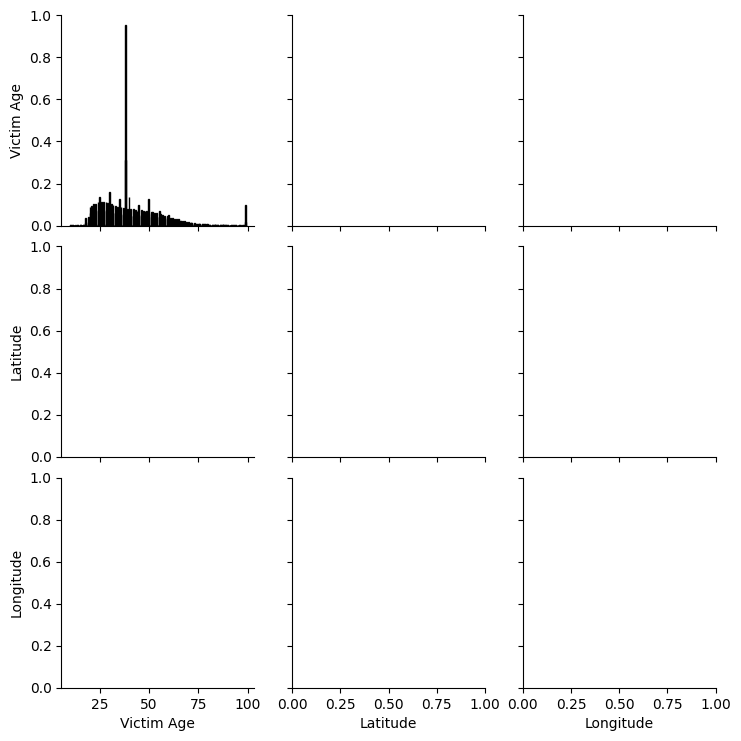

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df

# Distribution of the target variable (assuming "Severity" is your target)
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Road Accident Severity')
plt.show()

# Visualizing the relationship between numerical features and the target
sns.pairplot(df[['Victim Age', 'Latitude', 'Longitude', 'Severity']], hue='Severity', diag_kind='hist')

plt.suptitle('Pairplot of Numerical Features by Severity', y=1.02)
plt.show()

# Visualizing the relationship between categorical features and the target
plt.figure(figsize=(12, 8))
sns.countplot(x='Area Name', hue='Severity', data=df)
plt.title('Road Accident Severity by Area Name')
plt.xticks(rotation=45, ha='right')
plt.show()

# Exploring the distribution of accidents over days of the week
plt.figure(figsize=(8, 6))
sns.countplot(x='Day of Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Road Accidents over Days of the Week')
plt.show()


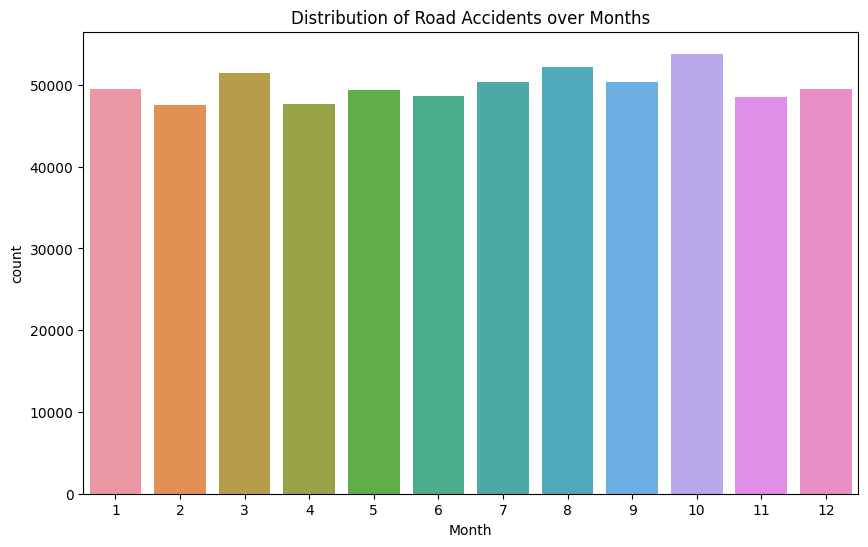

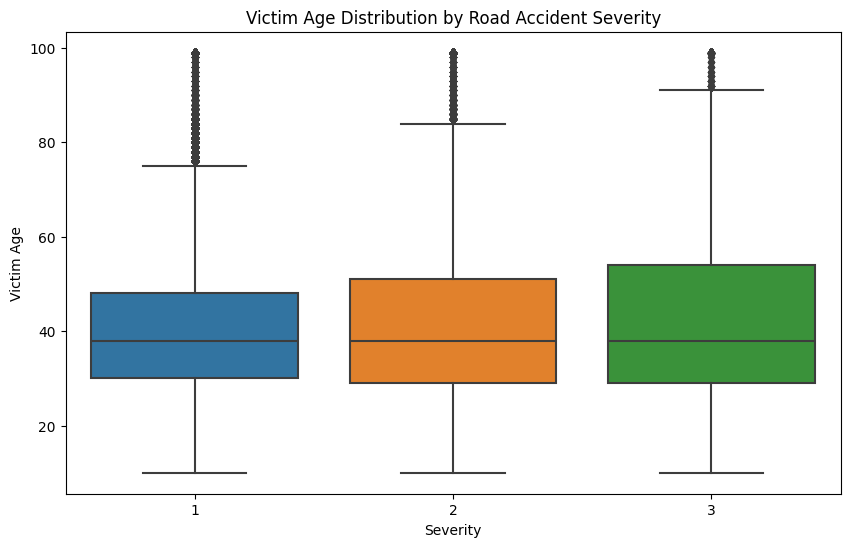

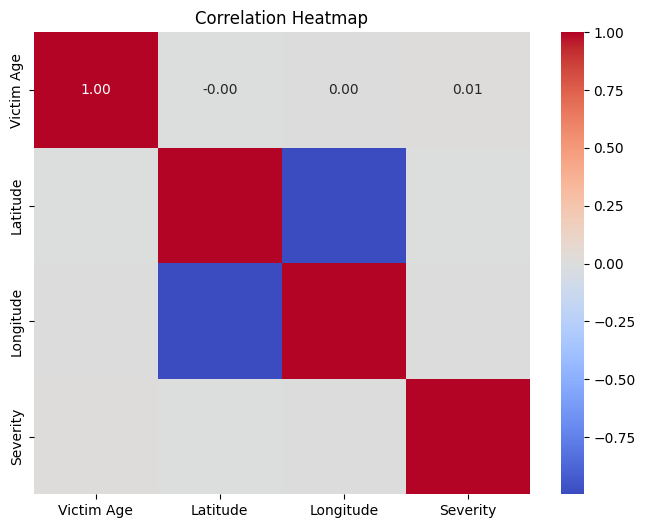

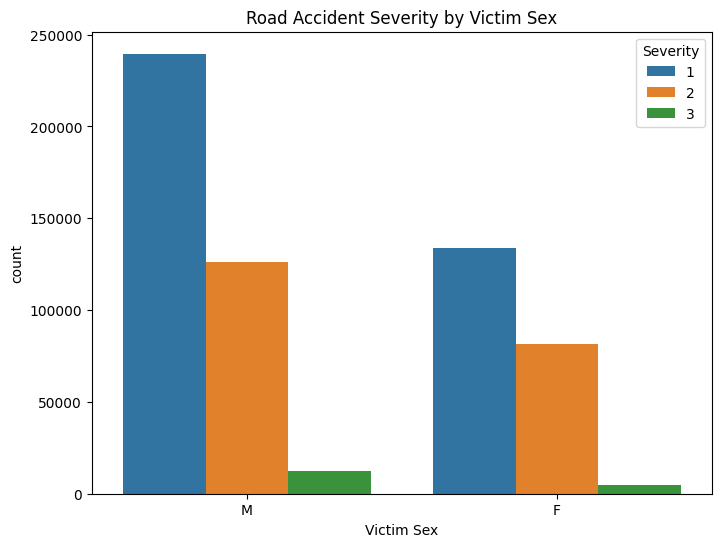

In [44]:
# Exploring the distribution of accidents over months
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, order=range(1, 13))
plt.title('Distribution of Road Accidents over Months')
plt.xlabel('Month')
plt.show()

# Box plot for Victim Age distribution by Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Victim Age', data=df)
plt.title('Victim Age Distribution by Road Accident Severity')
plt.show()

# Heatmap to visualize correlation between numerical features
correlation_matrix = df[['Victim Age', 'Latitude', 'Longitude', 'Severity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Countplot for Victim Sex distribution by Severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Victim Sex', hue='Severity', data=df)
plt.title('Road Accident Severity by Victim Sex')
plt.show()

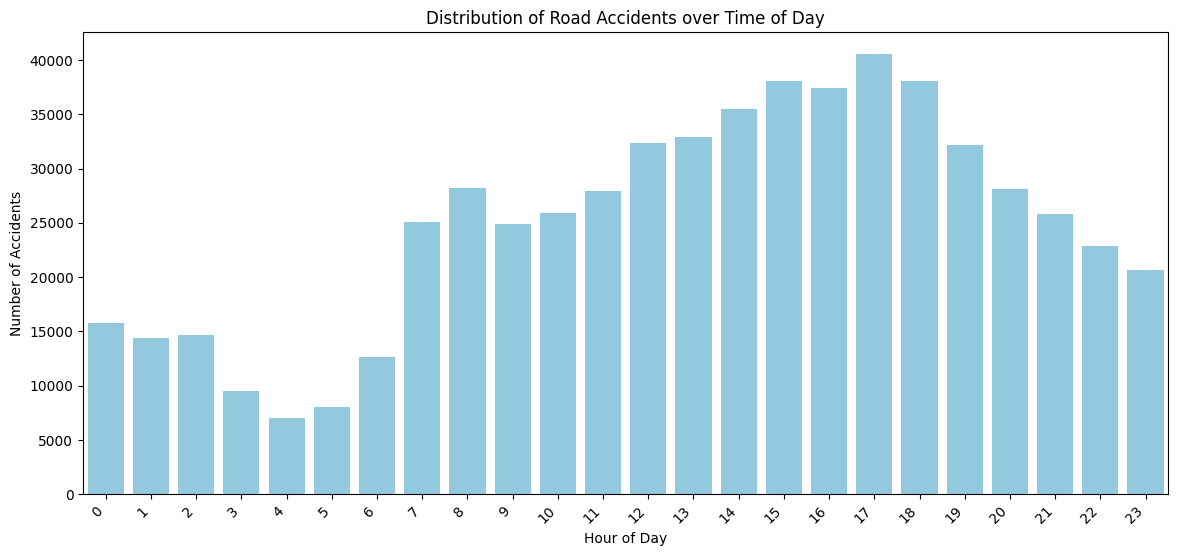

In [46]:
df['Hour'] = pd.to_datetime(df['Time Occurred'].astype(str)).dt.hour

# Plotting distribution of road accidents over time of day
plt.figure(figsize=(14, 6))
sns.countplot(x='Hour', data=df, color='skyblue')
plt.title('Distribution of Road Accidents over Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

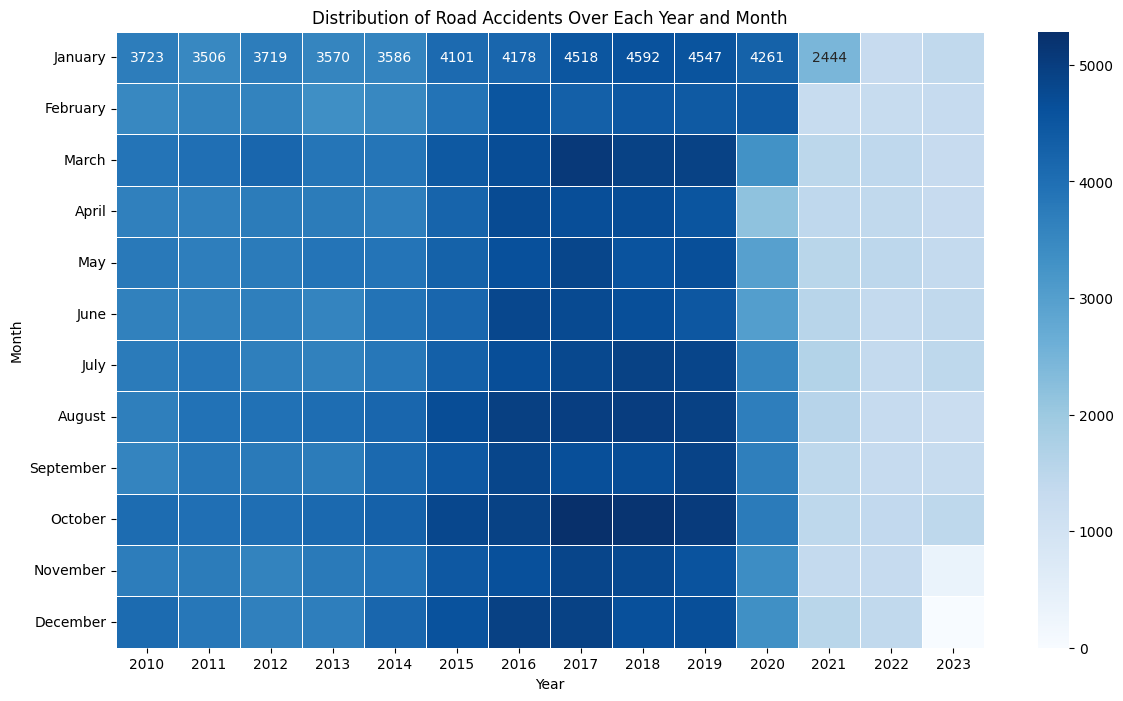

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date Occurred' is already in datetime format
# Extract year and month from 'Date Occurred'
df['Year'] = df['Date Occurred'].dt.year
df['Month'] = df['Date Occurred'].dt.month_name()

# Create a pivot table for heatmap
heatmap_data = df.groupby(['Year', 'Month']).size().reset_index(name='Accident Count')
heatmap_data['Month'] = pd.Categorical(heatmap_data['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
heatmap_data = heatmap_data.pivot_table(index='Month', columns='Year', values='Accident Count', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of Road Accidents Over Each Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


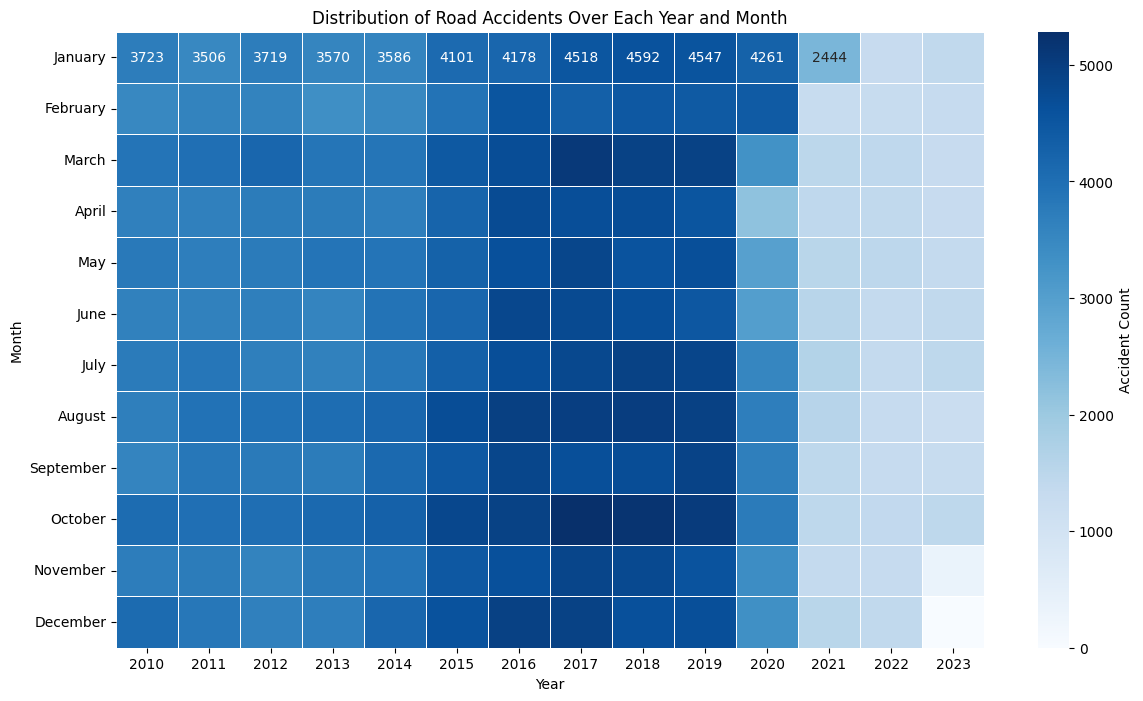

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date Occurred' is already in datetime format
# Extract year and month from 'Date Occurred'
df['Year'] = df['Date Occurred'].dt.year
df['Month'] = df['Date Occurred'].dt.strftime('%B')  # Ensure proper month formatting

# Create a pivot table for heatmap
heatmap_data = df.groupby(['Year', 'Month']).size().reset_index(name='Accident Count')
heatmap_data['Month'] = pd.Categorical(heatmap_data['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
heatmap_data = heatmap_data.pivot_table(index='Month', columns='Year', values='Accident Count', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Accident Count'})
plt.title('Distribution of Road Accidents Over Each Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


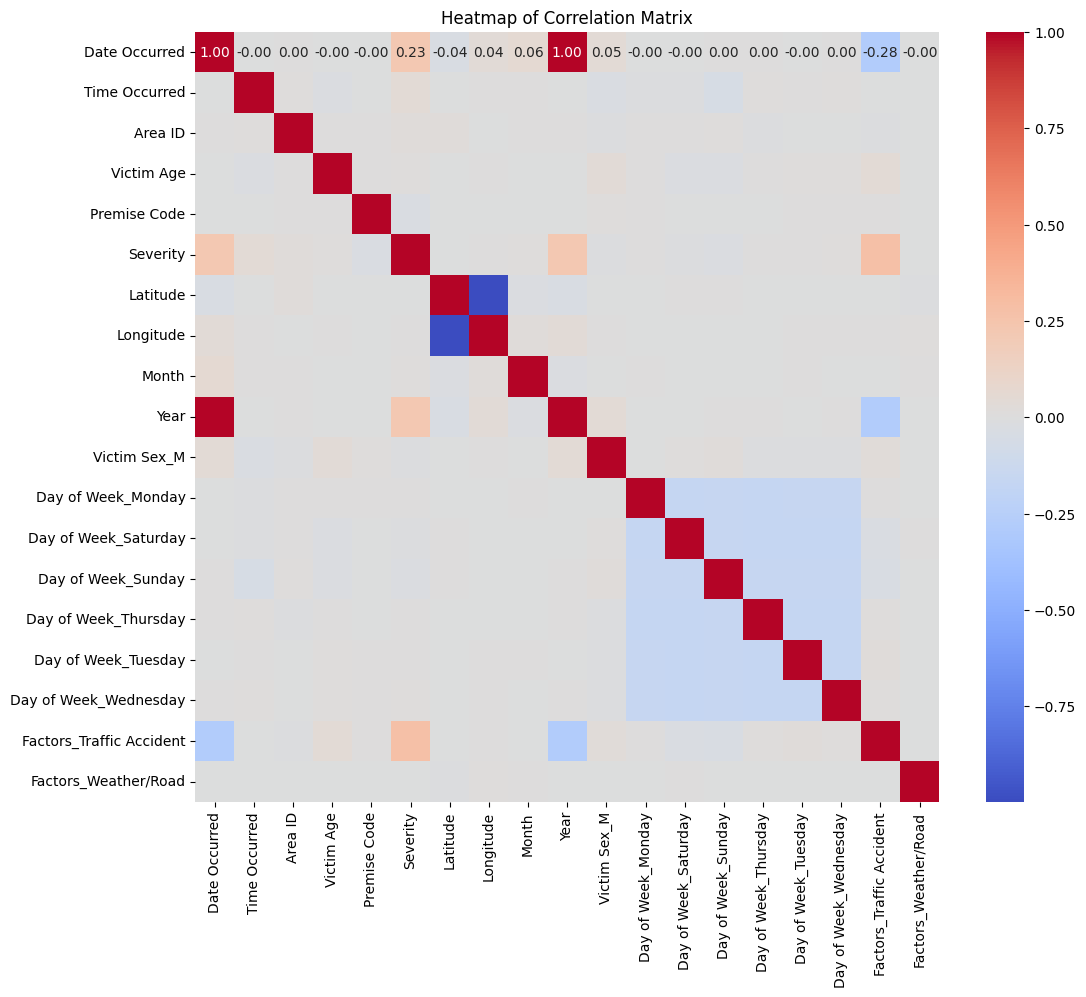

Selected Features:
Index(['Severity', 'Factors_Traffic Accident', 'Date Occurred', 'Year'], dtype='object')


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe containing the numeric columns
# Replace 'Severity' with the actual target column if needed
target_column = 'Severity'

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Victim Sex', 'Day of Week', 'Factors'], drop_first=True)

# Convert 'Time Occurred' column to numeric representation
df['Time Occurred'] = df['Time Occurred'].apply(lambda x: x.hour * 60 + x.minute + x.second / 60 if pd.notnull(x) else x)

# Exclude non-relevant columns and create a correlation matrix
exclude_columns = ['DR Number', 'Area Name', 'Address', 'Premise Description', 'Location', 'Date Reported']
numeric_df = df.drop(columns=exclude_columns)
correlation_matrix = numeric_df.corr()

# Print the correlation matrix and the values in the target column
#print("Correlation Matrix:")
#print(correlation_matrix)

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Feature selection based on correlation with the target variable
correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index

# Display selected features
print("Selected Features:")
print(selected_features)


Correlation Matrix for Selected Features:
                          Severity  Factors_Traffic Accident  Date Occurred   
Severity                  1.000000                  0.279209       0.225246  \
Factors_Traffic Accident  0.279209                  1.000000      -0.281047   
Date Occurred             0.225246                 -0.281047       1.000000   
Year                      0.224718                 -0.281443       0.996605   

                              Year  
Severity                  0.224718  
Factors_Traffic Accident -0.281443  
Date Occurred             0.996605  
Year                      1.000000  


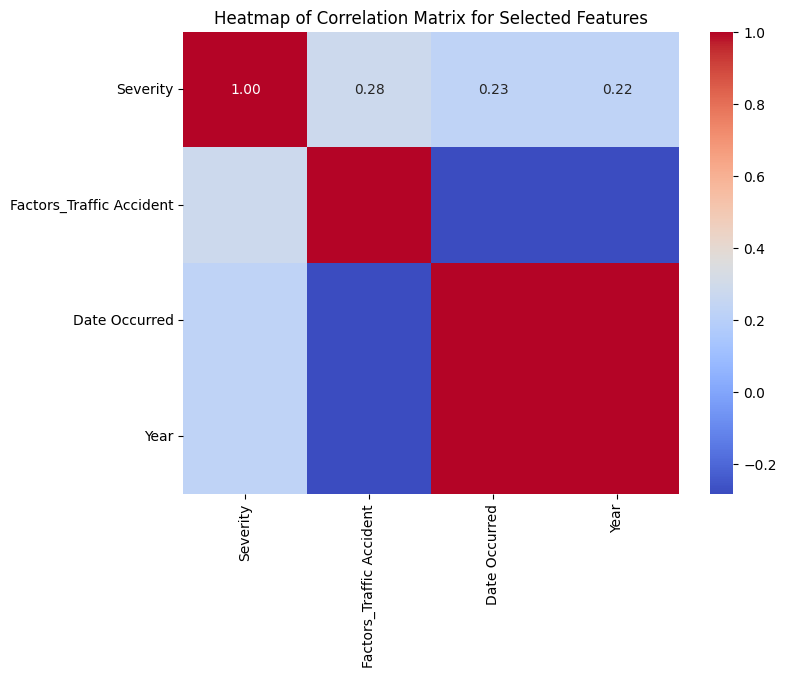

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe containing the selected features
selected_features = ['Severity', 'Factors_Traffic Accident', 'Date Occurred', 'Year']
selected_df = df[selected_features]

# Create a correlation matrix for the selected features
correlation_matrix_selected = selected_df.corr()

# Print the correlation matrix for the selected features
print("Correlation Matrix for Selected Features:")
print(correlation_matrix_selected)

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation Matrix for Selected Features")
plt.show()


The correlation matrix for the selected features shows the correlations between 'Severity', 'Factors_Traffic Accident', 'Date Occurred', and 'Year'. Here are the key observations:

'Severity' and 'Factors_Traffic Accident':

'Severity' and 'Factors_Traffic Accident' have a positive correlation of approximately 0.28. This suggests that incidents classified as traffic accidents tend to be associated with higher severity.
'Severity' and 'Date Occurred':

'Severity' and 'Date Occurred' have a positive correlation of approximately 0.23. This indicates a moderate positive relationship between the date of occurrence and the severity of incidents.
'Severity' and 'Year':

'Severity' and 'Year' have a positive correlation of approximately 0.22. This suggests a positive relationship between the year of the incident and its severity.
'Factors_Traffic Accident' and 'Date Occurred':

'Factors_Traffic Accident' and 'Date Occurred' have a negative correlation of approximately -0.28. This implies that traffic accidents might be less likely to occur on certain dates.
'Factors_Traffic Accident' and 'Year':

'Factors_Traffic Accident' and 'Year' also have a negative correlation of approximately -0.28. This indicates that the likelihood of an incident being a traffic accident might vary across different years.

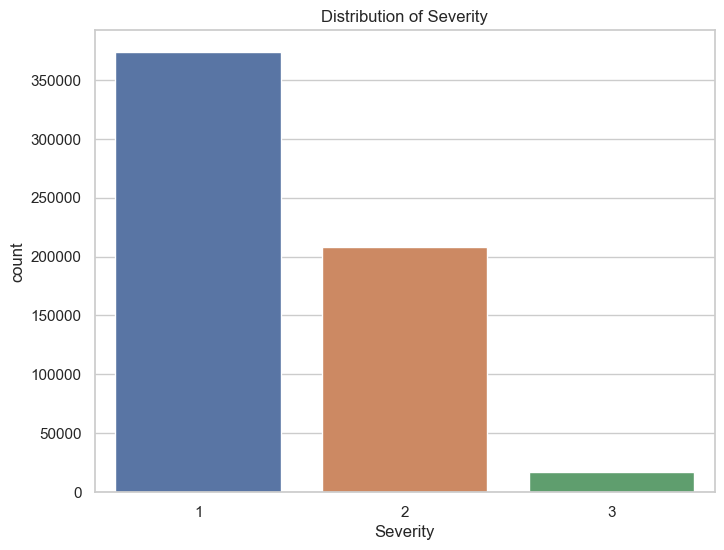

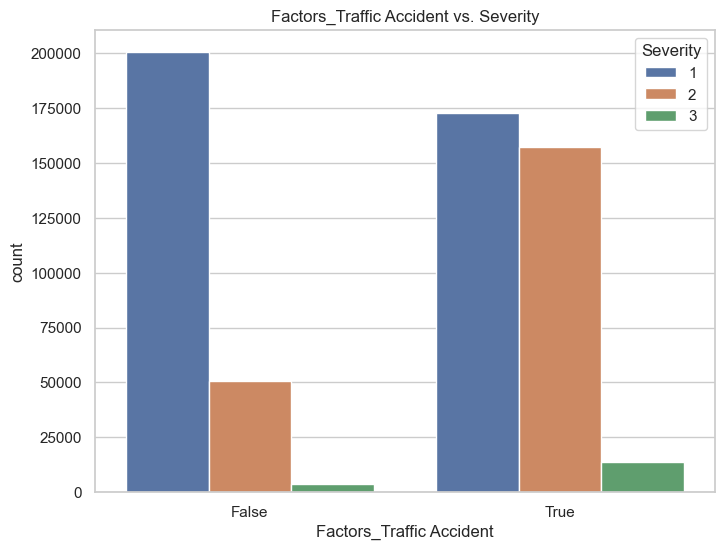

"\n\n# Plot 3: Date Occurred vs. Severity\nplt.figure(figsize=(12, 6))\nsns.lineplot(x='Date Occurred', y='Severity', data=df)\nplt.title('Date Occurred vs. Severity')\nplt.show()\n"

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Plot 1: Distribution of Severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Severity')
plt.show()

# Plot 2: Factors_Traffic Accident vs. Severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Factors_Traffic Accident', hue='Severity', data=df)
plt.title('Factors_Traffic Accident vs. Severity')
plt.show()
'''

# Plot 3: Date Occurred vs. Severity
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date Occurred', y='Severity', data=df)
plt.title('Date Occurred vs. Severity')
plt.show()
'''

In [ ]:
df['']

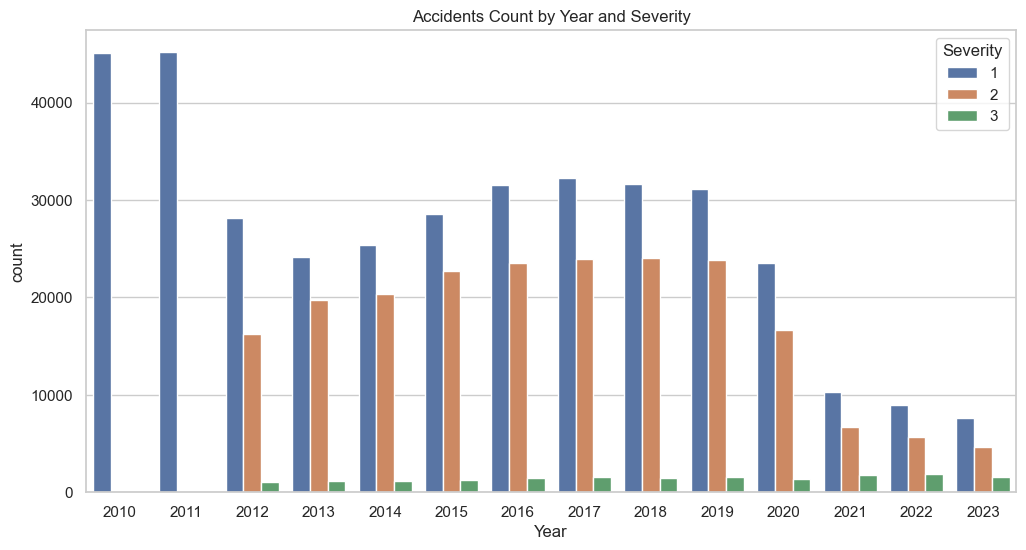

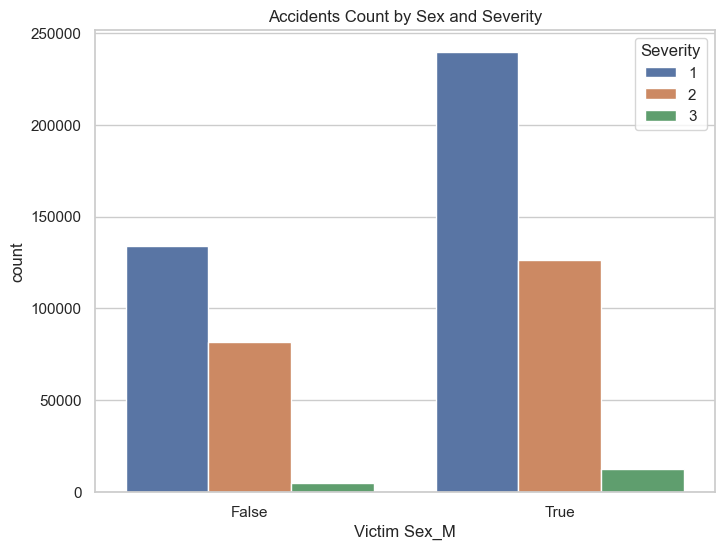

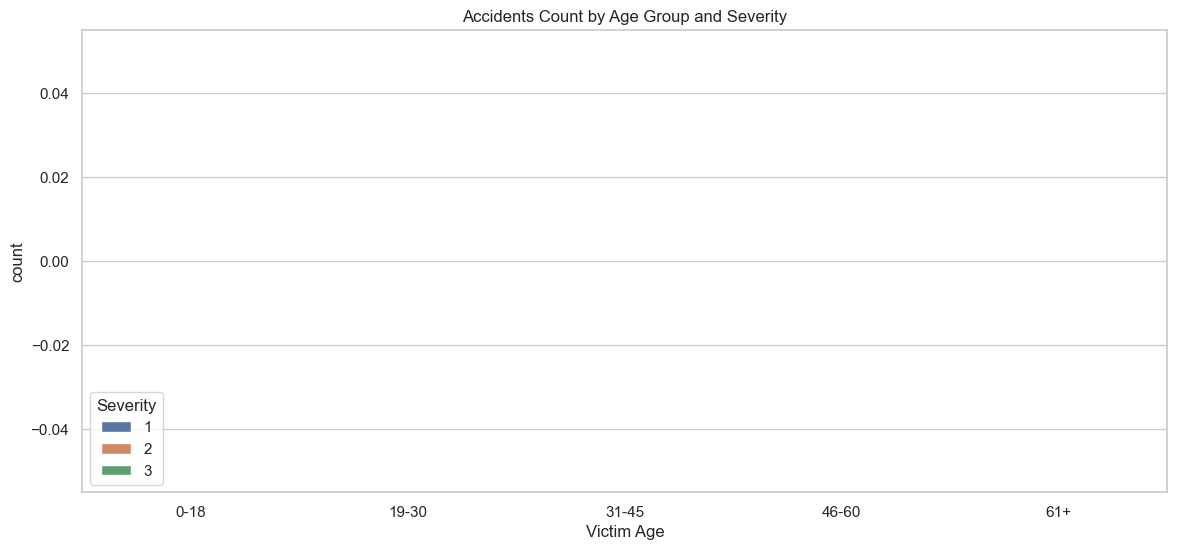

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Plot 1: Accidents Count by Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, hue='Severity')
plt.title('Accidents Count by Year and Severity')
plt.show()

# Plot 2: Accidents Count by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Victim Sex_M', data=df, hue='Severity')
plt.title('Accidents Count by Sex and Severity')
plt.show()

# Plot 3: Accidents Count by Age Group
plt.figure(figsize=(14, 6))
sns.countplot(x='Victim Age', data=df, hue='Severity', order=['0-18', '19-30', '31-45', '46-60', '61+'])
plt.title('Accidents Count by Age Group and Severity')
plt.show()


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598820 entries, 0 to 599779
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DR Number                 598820 non-null  Int64         
 1   Date Reported             598820 non-null  datetime64[ns]
 2   Date Occurred             598820 non-null  datetime64[ns]
 3   Time Occurred             598820 non-null  float64       
 4   Area ID                   598820 non-null  Int64         
 5   Area Name                 598820 non-null  string        
 6   Victim Age                598820 non-null  Int64         
 7   Premise Code              598820 non-null  Int64         
 8   Premise Description       598820 non-null  string        
 9   Address                   598820 non-null  string        
 10  Location                  598820 non-null  string        
 11  Severity                  598820 non-null  Int64         
 12  Latitud

In [336]:
# Numerical Summary
numerical_summary = selected_df.describe()

# Print Numerical Summary
print("Numerical Summary:")
print(numerical_summary)


Numerical Summary:
       Severity                  Date Occurred           Year
count  598820.0                         598820  598820.000000
mean   1.404976  2016-03-24 18:37:32.269463808    2015.728499
min         1.0            2010-01-01 00:00:00    2010.000000
25%         1.0            2013-04-26 00:00:00    2013.000000
50%         1.0            2016-05-08 00:00:00    2016.000000
75%         2.0            2018-12-13 00:00:00    2018.000000
max         3.0            2023-11-11 00:00:00    2023.000000
std    0.546267                            NaN       3.487702


In [339]:
import folium

# Create a subset of the dataframe (using the first 1000 rows)
subset_df = df.head(1000)

# Create a base map
map_center = [subset_df['Latitude'].mean(), subset_df['Longitude'].mean()]  # Center the map at the mean latitude and longitude
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers for each incident in the subset
for index, row in subset_df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=f"Severity: {row['Severity']}").add_to(mymap)

# Save the map to an HTML file
#mymap.save("incident_subset_map.html")

# Display the map
mymap
